# **Algunos Algoritmos de regresión**

La regresión lineal es el algoritmo más sencillo del aprendizaje automático y se puede entrenar de forma diferente. En esta sesión cubriremos los siguientes algoritmos lineales:

- Linear Regression
- Robust Regression
- Ridge Regression
- LASSO Regression
- Elastic Net
- Polynomial Regression
- Random Forest Regressor
- Support Vector Machine

Solemos usar métricas de evaluación para medir el desempeño de cada modelo.

1.Error Absoluto Medio (MAE - Mean Absolute Error):

- El MAE mide el promedio de las diferencias absolutas entre las predicciones del modelo y los valores reales.
Es fácil de entender, ya que representa el error promedio en la misma unidad que la variable objetivo.
Un valor de MAE más bajo indica que el modelo tiene un mejor rendimiento en términos de precisión.

2.Error Cuadrático Medio (MSE - Mean Squared Error):

- El MSE mide el promedio de los cuadrados de las diferencias entre las predicciones del modelo y los valores reales.
Castiga más a los errores grandes, lo que significa que errores mayores tienen un impacto significativamente mayor en el MSE.
También se expresa en unidades al cuadrado, lo que puede ser útil para resaltar errores extremadamente grandes.

3.Raíz del Error Cuadrático Medio (RMSE - Root Mean Squared Error):

- El RMSE es la raíz cuadrada del MSE y representa una medida de error en la misma unidad que la variable objetivo. Al igual que el MAE, es fácil de interpretar, y un valor más bajo indica un mejor rendimiento del modelo.

4.Coeficiente de Determinación (R^2 - R-squared):

- El coeficiente de determinación, R^2, cuantifica la proporción de la varianza en los datos que es explicada por el modelo.
R^2 varía entre 0 y 1, donde 1 indica un ajuste perfecto del modelo a los datos y 0 indica que el modelo no explica ninguna variación.
Un valor más alto de R^2 indica que el modelo es mejor para explicar la variabilidad en los datos.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [52]:
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [53]:
enaho = pd.read_parquet("../data/final/enaho_procesada.parquet")

In [54]:
enaho = pd.get_dummies(enaho, columns=['iddep'], prefix=['iddep'], dtype=int)
enaho = pd.get_dummies(enaho, columns=['año'], prefix=['año'], dtype=int)

enaho.columns

Index(['conglome', 'vivienda', 'hogar', 'codperso', 'ubigeo', 'male', 'edad',
       'casado', 'educacion', 'enfermedad_cronica', 'seguro_essalud',
       'seguro_privado', 'seguro_eps', 'seguro_policial', 'seguro_sis',
       'tamaño_empresa', 'formalidad', 'ingresos_mensuales', 'agua_potable',
       'electricidad', 'telefono', 'celular', 'tv', 'internet',
       'iddep_Amazonas', 'iddep_Ancash', 'iddep_Apurimac', 'iddep_Arequipa',
       'iddep_Ayacucho', 'iddep_Cajamarca', 'iddep_Callao', 'iddep_Cusco',
       'iddep_Huancavelica', 'iddep_Huanuco', 'iddep_Ica', 'iddep_Junin',
       'iddep_La Libertad', 'iddep_Lambayeque', 'iddep_Lima', 'iddep_Loreto',
       'iddep_Madre de Dios', 'iddep_Moquegua', 'iddep_Pasco', 'iddep_Piura',
       'iddep_Puno', 'iddep_San Martin', 'iddep_Tacna', 'iddep_Tumbes',
       'iddep_Ucayali', 'año_2018', 'año_2019'],
      dtype='object')

In [55]:
X = enaho[['male', 'edad',
       'casado', 'educacion', 'enfermedad_cronica', 'seguro_essalud',
       'seguro_privado', 'seguro_eps', 'seguro_policial', 'seguro_sis',
       'tamaño_empresa', 'agua_potable',
       'electricidad', 'telefono', 'celular', 'tv', 'internet',
       'iddep_Amazonas', 'iddep_Ancash', 'iddep_Apurimac', 'iddep_Arequipa',
       'iddep_Ayacucho', 'iddep_Cajamarca', 'iddep_Callao', 'iddep_Cusco',
       'iddep_Huancavelica', 'iddep_Huanuco', 'iddep_Ica', 'iddep_Junin',
       'iddep_La Libertad', 'iddep_Lambayeque', 'iddep_Lima', 'iddep_Loreto',
       'iddep_Madre de Dios', 'iddep_Moquegua', 'iddep_Pasco', 'iddep_Piura',
       'iddep_Puno', 'iddep_San Martin', 'iddep_Tacna', 'iddep_Tumbes',
       'iddep_Ucayali', 'año_2018', 'año_2019', 'formalidad']]

y = enaho[['ingresos_mensuales']]

## **Revisión del dataset y EDA**

In [56]:
enaho.head()

,conglome,vivienda,hogar,codperso,ubigeo,male,edad,casado,educacion,enfermedad_cronica,...,iddep_Moquegua,iddep_Pasco,iddep_Piura,iddep_Puno,iddep_San Martin,iddep_Tacna,iddep_Tumbes,iddep_Ucayali,año_2018,año_2019
0,5002,34,11,1,10101,0.0,49.0,0.0,2.0,1.0,...,0,0,0,0,0,0,0,0,1,0
1,5002,34,11,2,10101,0.0,22.0,0.0,2.0,1.0,...,0,0,0,0,0,0,0,0,1,0
2,5002,34,11,3,10101,0.0,21.0,0.0,2.0,1.0,...,0,0,0,0,0,0,0,0,1,0
5,5002,83,11,1,10101,1.0,60.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
6,5002,83,11,2,10101,0.0,58.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0


In [57]:
enaho.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52737 entries, 0 to 128274
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   conglome             52737 non-null  int64  
 1   vivienda             52737 non-null  int64  
 2   hogar                52737 non-null  int64  
 3   codperso             52737 non-null  int64  
 4   ubigeo               52737 non-null  int64  
 5   male                 52737 non-null  float64
 6   edad                 52737 non-null  float64
 7   casado               52737 non-null  float64
 8   educacion            52737 non-null  float64
 9   enfermedad_cronica   52737 non-null  float64
 10  seguro_essalud       52737 non-null  float64
 11  seguro_privado       52737 non-null  float64
 12  seguro_eps           52737 non-null  float64
 13  seguro_policial      52737 non-null  float64
 14  seguro_sis           52737 non-null  float64
 15  tamaño_empresa       52737 non-null  flo

In [58]:
enaho.describe().T

,count,mean,std,min,25%,50%,75%,max
conglome,52737.0,7837.583196,1660.171430,5001.000000,6460.000000,7743.000000,9208.000000,11350.000000
vivienda,52737.0,71.661300,52.563467,1.000000,31.000000,64.000000,102.000000,649.000000
hogar,52737.0,11.202306,1.675731,11.000000,11.000000,11.000000,11.000000,55.000000
codperso,52737.0,2.169255,1.441473,1.000000,1.000000,2.000000,3.000000,17.000000
ubigeo,52737.0,130022.286952,66276.078102,10101.000000,70106.000000,140112.000000,180101.000000,250401.000000
male,52737.0,0.598119,0.490283,0.000000,0.000000,1.000000,1.000000,1.000000
edad,52737.0,38.918501,14.134688,14.000000,27.000000,38.000000,49.000000,95.000000
casado,52737.0,0.266227,0.441988,0.000000,0.000000,0.000000,1.000000,1.000000
educacion,52737.0,2.192958,0.759628,1.000000,2.000000,2.000000,3.000000,4.000000
enfermedad_cronica,52737.0,0.413979,0.492549,0.000000,0.000000,0.000000,1.000000,1.000000


In [59]:
enaho.columns

Index(['conglome', 'vivienda', 'hogar', 'codperso', 'ubigeo', 'male', 'edad',
       'casado', 'educacion', 'enfermedad_cronica', 'seguro_essalud',
       'seguro_privado', 'seguro_eps', 'seguro_policial', 'seguro_sis',
       'tamaño_empresa', 'formalidad', 'ingresos_mensuales', 'agua_potable',
       'electricidad', 'telefono', 'celular', 'tv', 'internet',
       'iddep_Amazonas', 'iddep_Ancash', 'iddep_Apurimac', 'iddep_Arequipa',
       'iddep_Ayacucho', 'iddep_Cajamarca', 'iddep_Callao', 'iddep_Cusco',
       'iddep_Huancavelica', 'iddep_Huanuco', 'iddep_Ica', 'iddep_Junin',
       'iddep_La Libertad', 'iddep_Lambayeque', 'iddep_Lima', 'iddep_Loreto',
       'iddep_Madre de Dios', 'iddep_Moquegua', 'iddep_Pasco', 'iddep_Piura',
       'iddep_Puno', 'iddep_San Martin', 'iddep_Tacna', 'iddep_Tumbes',
       'iddep_Ucayali', 'año_2018', 'año_2019'],
      dtype='object')

In [60]:

# ! NO MODIFICAR
# * Función creada para contar el porcentaje de missings existente por cada variable

def msv_1(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Porcentaje de missing values por columna', fontsize=20, weight='bold' , y=1.1)
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+2.5, f'Columns con más de {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 0.5, f'Columnas con menos de {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columnas', size=15, weight='bold')
    plt.ylabel('Porcentaje de missing values')
    plt.yticks(weight ='bold')
    
    return plt.show()

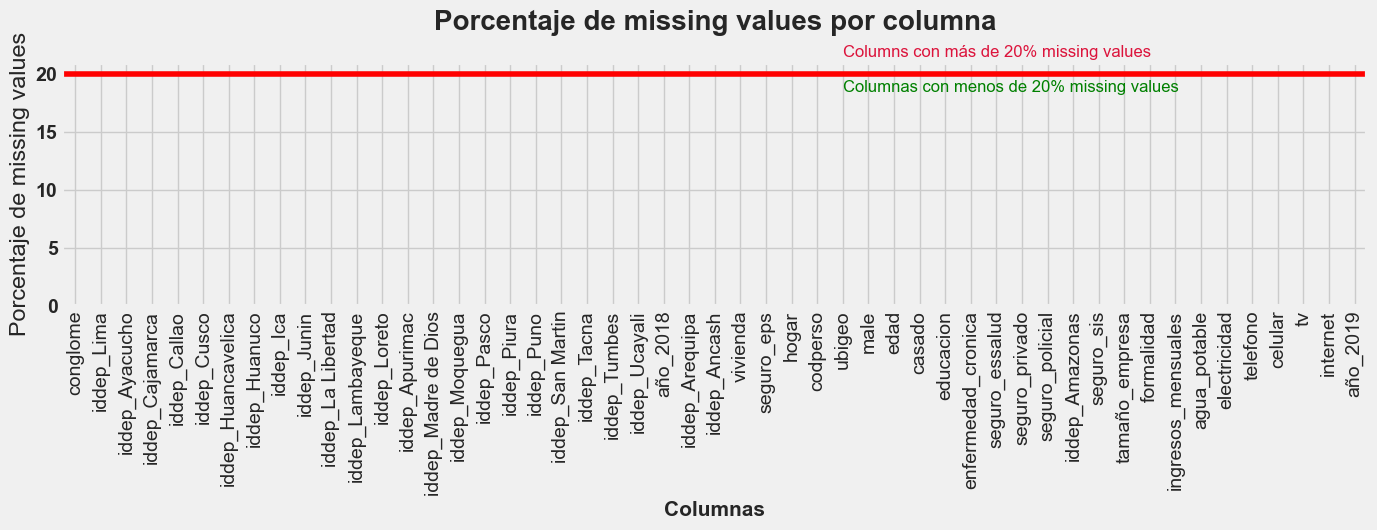

In [61]:
msv_1(enaho, 20, color=sns.color_palette('Reds',15))

<Axes: >

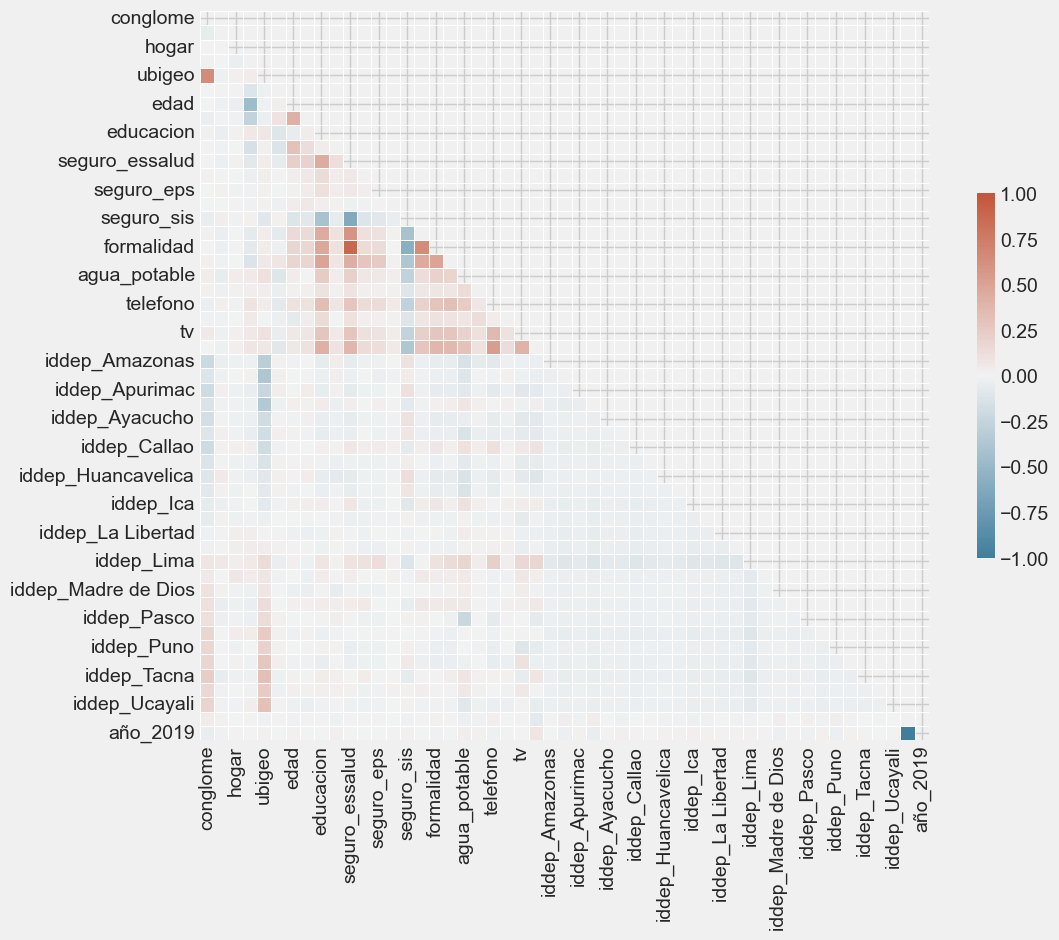

In [62]:
# Calcula la matriz de correlación entre las columnas del DataFrame.
corr = enaho.corr()
# Crea una máscara triangular superior en la matriz de correlación para ocultar los valores duplicados.
mask = np.triu(np.ones_like(corr, dtype=bool))
# Crea una figura para el gráfico de calor de la matriz de correlación.
f, ax = plt.subplots(figsize=(11, 9))
# Define una paleta de colores divergentes para el gráfico de calor.
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Trazar un mapa de calor de la matriz de correlación sin etiquetas.
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)


## **Preparemos los insumos**

Train y Test

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Funciones para evaluar desempeño

In [64]:
import numpy as np
from sklearn.metrics import r2_score

def evaluar_modelo_regression(modelo, X_train, y_train, X_test, y_test):
    """
    Evalúa un modelo de regresión y devuelve las métricas MAPE, MPE y R^2 para
    los conjuntos de entrenamiento y prueba.

    Parámetros:
        modelo: El modelo de regresión ya ajustado.
        X_train: Las características del conjunto de entrenamiento.
        y_train: Las etiquetas del conjunto de entrenamiento.
        X_test: Las características del conjunto de prueba.
        y_test: Las etiquetas del conjunto de prueba.

    Retorna:
        Un diccionario que contiene las métricas MAPE, MPE y R^2 para los conjuntos
        de entrenamiento y prueba.
    """
    # Predicciones en conjunto de entrenamiento y prueba
    train_pred = modelo.predict(X_train)
    test_pred = modelo.predict(X_test)

    # Métricas en conjunto de entrenamiento
    train_r2 = r2_score(y_train, train_pred)
    train_mape = np.mean(np.abs((y_train - train_pred) / y_train)) * 100
    train_mpe = np.mean((y_train - train_pred) / y_train) * 100

    # Métricas en conjunto de prueba
    test_r2 = r2_score(y_test, test_pred)
    test_mape = np.mean(np.abs((y_test - test_pred) / y_test)) * 100
    test_mpe = np.mean((y_test - test_pred) / y_test) * 100

    # Retornar métricas
    return {
        "Conjunto de entrenamiento": {
            "R^2": train_r2,
            "MAPE": train_mape,
            "MPE": train_mpe
        },
        "Conjunto de prueba": {
            "R^2": test_r2,
            "MAPE": test_mape,
            "MPE": test_mpe
        }
    }


## **Linear Regression Model**

La regresión lineal es un modelo que busca establecer una relación lineal entre una variable dependiente y una o más variables independientes.
Busca encontrar la mejor línea recta que se ajuste a los datos para realizar predicciones.

In [65]:

# * Entrenamos el modelo

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

**MAPE (Mean Absolute Percentage Error):**
Definición: El MAPE es una medida de la precisión de un modelo de predicción en términos de porcentaje de error absoluto promedio.

**MPE (Mean Percentage Error):**
Definición: El MPE es una medida de la precisión de un modelo de predicción en términos de porcentaje de error promedio.

**R^2 (Coeficiente de determinación):**
Definición: El coeficiente de determinación, también conocido como R cuadrado, es una medida que indica cuánta variabilidad en la variable de respuesta puede explicarse por el modelo. Es una medida de qué tan bien se ajustan los valores predichos a los valores reales.

In [66]:
evaluar_modelo_regression(lin_reg, X_train, y_train, X_test, y_test)

{'Conjunto de entrenamiento': {'R^2': 0.4698101090609085,
  'MAPE': 103.03618996735241,
  'MPE': -71.19920044967046},
 'Conjunto de prueba': {'R^2': 0.4607984491560526,
  'MAPE': 100.98058260932581,
  'MPE': -69.34945738611061}}

In [67]:

# * Veamos los coeficientes

# Obtener los coeficientes y los nombres de las columnas
coeficientes = lin_reg.coef_
nombres_columnas = X_train.columns
# Asegurarse de que los coeficientes sean 1D
coeficientes = coeficientes.flatten()
# Crear un DataFrame con los nombres de las columnas y los coeficientes
coeficientes_df = pd.DataFrame({'Columna': nombres_columnas, 'Coeficiente': coeficientes})
coeficientes_df

,Columna,Coeficiente
0,male,3.169155e+02
1,edad,9.566426e+00
2,casado,1.658843e+02
3,educacion,4.710818e+02
4,enfermedad_cronica,-4.601607e+01
5,seguro_essalud,-1.361360e+02
6,seguro_privado,1.548808e+03
7,seguro_eps,1.724926e+03
8,seguro_policial,-1.469119e+02
9,seguro_sis,-5.629829e+01


In [68]:

# * Predicciones

# Calculamos la predicción
pred = lin_reg.predict(X_test)


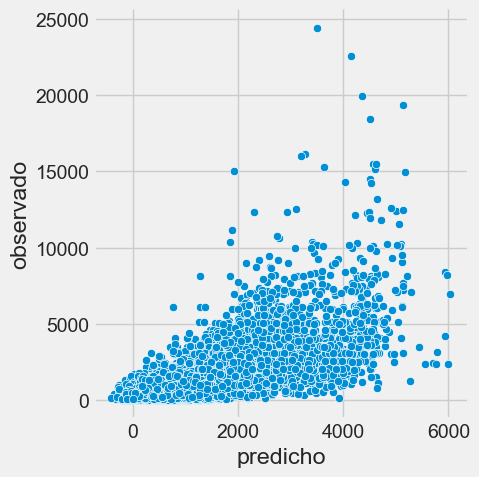

In [69]:

# * Comparamos las predicciones con valores observados
# Creamos un DF
pred = pd.DataFrame(pred, columns=['prediccion_lr'])
# Lo unimos con la data observada
pred_lin_reg = pd.concat([pred, y_test.reset_index(drop=True)], axis=1, ignore_index=True)
pred_lin_reg.columns =['predicho','observado']
# Creamos un gráfico
sns.relplot(data=pred_lin_reg, x='predicho',y='observado')

<Axes: xlabel='error', ylabel='Count'>

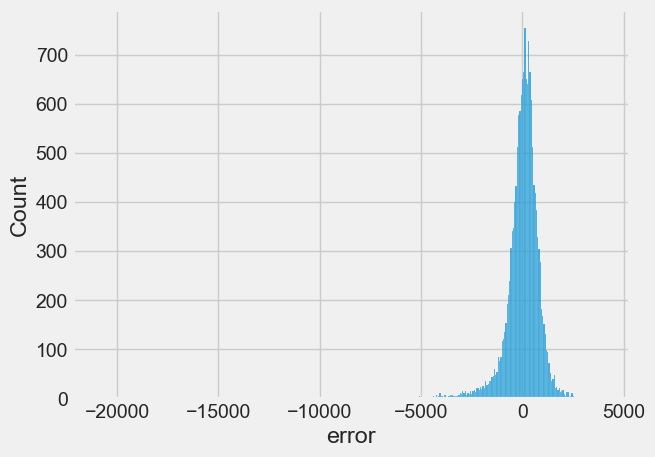

In [70]:

# * Observamos la distribución de los errores
pred_lin_reg['error'] = pred_lin_reg['predicho'] - pred_lin_reg['observado']
sns.histplot(data=pred_lin_reg, x='error')

## **Ridge Regression**

Ridge Regression es una técnica de regresión lineal que agrega una penalización L2 a la función de costo.
Ayuda a prevenir el sobreajuste (overfitting) al restringir los coeficientes de regresión, lo que a menudo conduce a modelos más estables.

In [76]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.1, solver='cholesky', tol=0.00001, random_state=42)
# alpha= Controla la fuerza de la regularización aplicada al modelo.
# solver= especifica el algoritmo utilizado para resolver el problema de optimización asociado con el modelo Ridge
# tol= es la tolerancia utilizada para determinar la convergencia del algoritmo de optimización
# random_state= se utiliza para controlar la inicialización aleatoria del modelo y asegurar la reproducibilidad de los resultados.

model.fit(X_train, y_train)

# *************
# * EVALUACIÓN
# *************

evaluar_modelo_regression(model, X_train, y_train, X_test, y_test)

{'Conjunto de entrenamiento': {'R^2': 0.4698100901272274,
  'MAPE': 103.03699389887933,
  'MPE': -71.20067879197342},
 'Conjunto de prueba': {'R^2': 0.4607976936000874,
  'MAPE': 100.98188196281608,
  'MPE': -69.35143841717799}}